We try to identify the areas of interests of the users based on their phone usage, day of the week and time of the day on which they are using it.

Analysis based on the following assumption

On Weekdays:
  1. People probably are at work during normal working hours
  2. They probably are at home in the early morning and during the late night
  3. They probably spend time commuting between work and home everyday

By making use of de-anonmized CDR data and the above assumptions, we find the predictable manners of users moving from home to work with a few errands in between. We then run a K-Means model on the data to isolate the geolocations where a user spends most of his/her time.

This also gives a good use case to understand exactly how useful is telephone metadata. 

In [1]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
import numpy as np
matplotlib.style.use('ggplot') # Look Pretty

In [2]:
def clusterInfo(model):
    print ("Cluster Analysis Inertia: ", model.inertia_)
    print ('------------------------------------------')
    for i in range(len(model.cluster_centers_)):
        print ("\nCluster ", i)
        print ("Centroid ", model.cluster_centers_[i])
        print ("#Samples ", (model.labels_==i).sum()) # NumPy Power

In [3]:
# Finding the cluster with the least # attached nodes
def clusterWithFewestSamples(model):
    # Ensuring there's at least one cluster...
    minSamples = len(model.labels_)
    minCluster = 0
    for i in range(len(model.cluster_centers_)):
        if minSamples > (model.labels_==i).sum():
            minCluster = i
            minSamples = (model.labels_==i).sum()
    print ("\nCluster With Fewest Samples: ", minCluster)
    return (model.labels_==minCluster)

In [4]:
def doKMeans(data, clusters=0):
    # Printing out the centroid locations and adding them onto the scatter plot. 
    df1 = pd.concat([data.TowerLon, data.TowerLat], axis = 1)
    kmeans = KMeans(n_clusters= clusters)
    kmeans.fit(df1)
    model = kmeans.predict(df1)
    centroids = kmeans.cluster_centers_
    ax.scatter(x = centroids[:, 0], y = centroids[:, 1], c = 'r', marker = 'x', s = 100)
    model = kmeans
    print(centroids)
    return model

In [5]:
#
# Loading up the dataset and take a peek at its head and dtypes.

df = pd.read_csv("Datasets\\CDR.csv", sep = ",", header = 0)
print(df.head(2))

# Converting the date and time attributes
df.CallDate = pd.to_datetime(df.CallDate, errors = 'coerce')
df.CallTime = pd.to_timedelta(df.CallTime, errors = 'coerce')


#
# Creating a unique list of of the phone-number values stored in the
# "In" column of the dataset
unique_numbers = df.In.unique()

           In         Out Direction    CallDate         CallTime  DOW  \
0  4638472273  2666307251  Incoming  2010-12-25  07:16:24.736813  Sat   
1  4638472273  1755442610  Incoming  2010-12-25  21:18:30.053710  Sat   

         Duration                               TowerID   TowerLat   TowerLon  
0  0:02:41.741499  0db53dd3-eb9c-4344-abc5-c2d74ebc3eec  32.731611 -96.709417  
1  0:02:47.108750  aeaf8b43-8034-44fe-833d-31854a75acbf  32.731722 -96.709500  




Examining person: 0
[[-96.90932118  32.90004365]
 [-96.70816184  32.73323174]
 [-96.85151976  32.87385429]
 [-96.81945506  32.84577996]
 [-96.9928955   32.93119475]]
4638472273

Cluster With Fewest Samples:  4
Its Waypoint Time:  0 days 10:13:59.189499


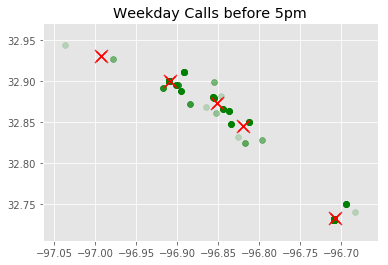

Cluster Analysis Inertia:  0.07111076979579802
------------------------------------------

Cluster  0
Centroid  [-96.90932118  32.90004365]
#Samples  949

Cluster  1
Centroid  [-96.70816184  32.73323174]
#Samples  306

Cluster  2
Centroid  [-96.85151976  32.87385429]
#Samples  94

Cluster  3
Centroid  [-96.81945506  32.84577996]
#Samples  52

Cluster  4
Centroid  [-96.9928955   32.93119475]
#Samples  4


Examining person: 1
[[-96.92355104  32.87096795]
 [-96.93522186  32.69633766]
 [-96.91638645  32.7674931 ]
 [-96.91649315  32.72173631]
 [-96.93540466  32.67053576]]
1559410755

Cluster With Fewest Samples:  4
Its Waypoint Time:  0 days 08:17:30.382022


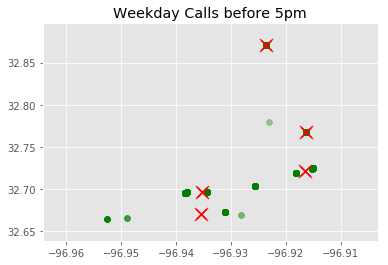

Cluster Analysis Inertia:  0.0354594332798154
------------------------------------------

Cluster  0
Centroid  [-96.92355104  32.87096795]
#Samples  921

Cluster  1
Centroid  [-96.93522186  32.69633766]
#Samples  3029

Cluster  2
Centroid  [-96.91638645  32.7674931 ]
#Samples  125

Cluster  3
Centroid  [-96.91649315  32.72173631]
#Samples  235

Cluster  4
Centroid  [-96.93540466  32.67053576]
#Samples  92


Examining person: 2
[[-96.893333    32.780278  ]
 [-96.86563953  32.86562866]
 [-96.893917    32.81075   ]
 [-96.89913925  32.74273613]
 [-96.88071769  32.81719866]]
4931532174

Cluster With Fewest Samples:  3
Its Waypoint Time:  0 days 10:13:38.152380


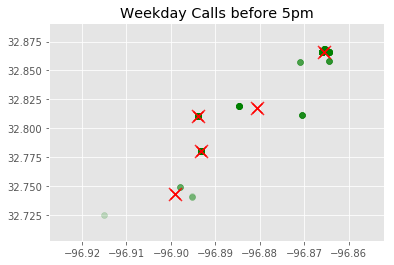

Cluster Analysis Inertia:  0.0037206859577767677
------------------------------------------

Cluster  0
Centroid  [-96.893333  32.780278]
#Samples  838

Cluster  1
Centroid  [-96.86563953  32.86562866]
#Samples  197

Cluster  2
Centroid  [-96.893917  32.81075 ]
#Samples  56

Cluster  3
Centroid  [-96.89913925  32.74273613]
#Samples  8

Cluster  4
Centroid  [-96.88071769  32.81719866]
#Samples  32


Examining person: 3
[[-96.8472893   32.85371225]
 [-96.83512404  32.84703353]
 [-96.852389    32.861222  ]
 [-96.844722    32.865833  ]
 [-96.834514    32.8357845 ]]
2419930464

Cluster With Fewest Samples:  4
Its Waypoint Time:  0 days 07:00:04.374669


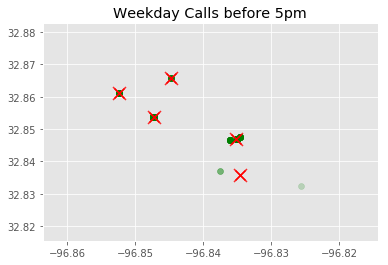

Cluster Analysis Inertia:  0.0002140815307430324
------------------------------------------

Cluster  0
Centroid  [-96.8472893   32.85371225]
#Samples  701

Cluster  1
Centroid  [-96.83512404  32.84703353]
#Samples  237

Cluster  2
Centroid  [-96.852389  32.861222]
#Samples  22

Cluster  3
Centroid  [-96.844722  32.865833]
#Samples  12

Cluster  4
Centroid  [-96.834514   32.8357845]
#Samples  4


Examining person: 4
[[-96.75715454  32.92276766]
 [-96.730278    32.875     ]
 [-96.741944    32.909167  ]
 [-96.76024108  32.91727969]
 [-96.800722    32.950861  ]]
1884182865

Cluster With Fewest Samples:  4
Its Waypoint Time:  0 days 08:08:18.436173


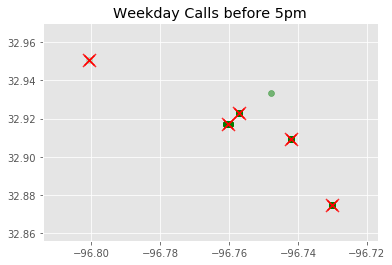

Cluster Analysis Inertia:  0.000632124828845876
------------------------------------------

Cluster  0
Centroid  [-96.75715454  32.92276766]
#Samples  699

Cluster  1
Centroid  [-96.730278  32.875   ]
#Samples  169

Cluster  2
Centroid  [-96.741944  32.909167]
#Samples  65

Cluster  3
Centroid  [-96.76024108  32.91727969]
#Samples  127

Cluster  4
Centroid  [-96.800722  32.950861]
#Samples  1


Examining person: 5
[[-96.87011278  32.81172513]
 [-96.685556    32.770833  ]
 [-96.82541559  32.80441167]
 [-96.78889883  32.79773465]
 [-96.923528    32.870944  ]]
3688089071

Cluster With Fewest Samples:  4
Its Waypoint Time:  0 days 07:54:18.237611


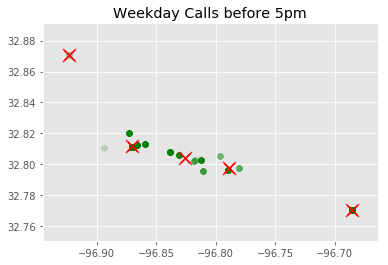

Cluster Analysis Inertia:  0.012567683562867643
------------------------------------------

Cluster  0
Centroid  [-96.87011278  32.81172513]
#Samples  454

Cluster  1
Centroid  [-96.685556  32.770833]
#Samples  128

Cluster  2
Centroid  [-96.82541559  32.80441167]
#Samples  54

Cluster  3
Centroid  [-96.78889883  32.79773465]
#Samples  23

Cluster  4
Centroid  [-96.923528  32.870944]
#Samples  2


Examining person: 6
[[-96.742528    32.7535    ]
 [-96.84066398  32.70494423]
 [-96.796111    32.7375    ]
 [-96.759167    32.739722  ]
 [-96.72787475  32.777528  ]]
4555003213

Cluster With Fewest Samples:  4
Its Waypoint Time:  0 days 09:51:31.783020


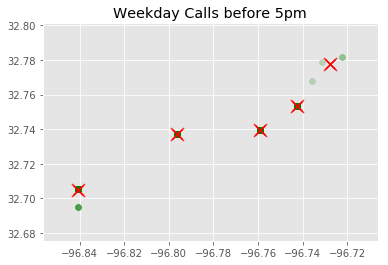

Cluster Analysis Inertia:  0.0007709942801140031
------------------------------------------

Cluster  0
Centroid  [-96.742528  32.7535  ]
#Samples  621

Cluster  1
Centroid  [-96.84066398  32.70494423]
#Samples  184

Cluster  2
Centroid  [-96.796111  32.7375  ]
#Samples  53

Cluster  3
Centroid  [-96.759167  32.739722]
#Samples  82

Cluster  4
Centroid  [-96.72787475  32.777528  ]
#Samples  4


Examining person: 7
[[-96.604444    32.703056  ]
 [-96.83278954  32.72089181]
 [-96.75954284  32.71244602]
 [-96.8066212   32.72178311]
 [-96.709444    32.731611  ]]
2068627935

Cluster With Fewest Samples:  4
Its Waypoint Time:  0 days 07:45:03.432760


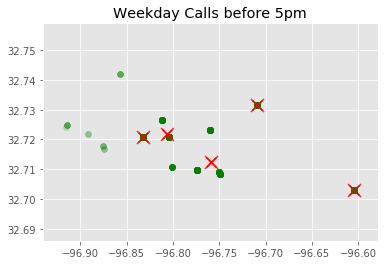

Cluster Analysis Inertia:  0.0948866407728382
------------------------------------------

Cluster  0
Centroid  [-96.604444  32.703056]
#Samples  392

Cluster  1
Centroid  [-96.83278954  32.72089181]
#Samples  1497

Cluster  2
Centroid  [-96.75954284  32.71244602]
#Samples  232

Cluster  3
Centroid  [-96.8066212   32.72178311]
#Samples  151

Cluster  4
Centroid  [-96.709444  32.731611]
#Samples  22


Examining person: 8
[[-96.91907309  32.70053036]
 [-96.81270407  32.77396536]
 [-96.89192295  32.72172802]
 [-96.857611    32.741889  ]
 [-96.875194    32.717667  ]]
2894365987

Cluster With Fewest Samples:  0
Its Waypoint Time:  0 days 09:51:16.025173


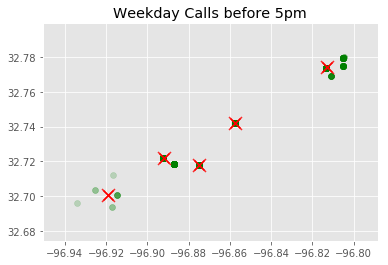

Cluster Analysis Inertia:  0.017336842912265876
------------------------------------------

Cluster  0
Centroid  [-96.91907309  32.70053036]
#Samples  11

Cluster  1
Centroid  [-96.81270407  32.77396536]
#Samples  1077

Cluster  2
Centroid  [-96.89192295  32.72172802]
#Samples  3277

Cluster  3
Centroid  [-96.857611  32.741889]
#Samples  298

Cluster  4
Centroid  [-96.875194  32.717667]
#Samples  177


Examining person: 9
[[-96.802574    32.98580109]
 [-96.77896656  32.77240328]
 [-96.805639    32.932     ]
 [-96.8042638   32.90626365]
 [-96.80231738  32.95821508]]
8549533077

Cluster With Fewest Samples:  2
Its Waypoint Time:  0 days 07:58:46.796325


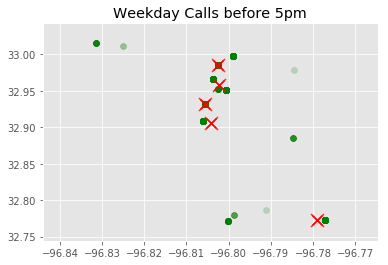

Cluster Analysis Inertia:  0.07812521753952958
------------------------------------------

Cluster  0
Centroid  [-96.802574    32.98580109]
#Samples  2081

Cluster  1
Centroid  [-96.77896656  32.77240328]
#Samples  576

Cluster  2
Centroid  [-96.805639  32.932   ]
#Samples  99

Cluster  3
Centroid  [-96.8042638   32.90626365]
#Samples  99

Cluster  4
Centroid  [-96.80231738  32.95821508]
#Samples  195


In [6]:
# 
# Creating a loop that filters and plots data for each of the 10 users
#
for i in range(10):
    user1 = df[df.In == unique_numbers[i]]
    print ("\n\nExamining person: "+ str(i))

    #
    # Altering the slice so that it includes only Weekday (Mon-Fri) values and before 5pm
    user1 = user1.loc[~(user1['DOW'].isin(['Sun', 'Sat']))]
    user1 = user1[(user1['CallTime']<'17:00:00')]
    
    #
    # Plotting the Cell Towers the user is connected to
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
    ax.set_title('Weekday Calls before 5pm')
  

    # Running K-Means with K=3 or K=4. There really should only be a two areas of concentration. If there isn't
    # and multiple areas  are "hot", then we'll run with K=5, with the goal being that all centroids except two will
    # sweep up the annoying outliers and not-home, not-work travel occasions.
    model = doKMeans(user1, 5)
    print(unique_numbers[i])
    
    #
    # Printing out the mean CallTime value for the samples belonging to the cluster with the LEAST
    # samples attached to it. The cluster with the MOST samples will be work.
    # The cluster with the 2nd most samples will be home. And the K=3 cluster with the least samples
    # should be somewhere in between the two.
    midWayClusterIndices = clusterWithFewestSamples(model)
    midWaySamples = user1[midWayClusterIndices]
    print ("Its Waypoint Time: ", midWaySamples.CallTime.mean())
    
    
    ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=169, c='r', marker='x', alpha=0.8, linewidths=2)
    plt.show()
    clusterInfo(model)